**[1] Importing Libraries**

In [80]:
#@ IMPORTING LIBRARIES AND DEPENDENCIES:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

**[2] Loading Data**

In [81]:
#@ IMPORTING DATASET:
PATH = "../data/data.csv"
select_cols = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 
               'highway MPG', 'city mpg', 'MSRP']
data = pd.read_csv(PATH, usecols=select_cols)

**[3] Data Preparation**

In [82]:
#@ INSPECTING DATAFRAME:
print(data.shape)

(11914, 10)


In [83]:
#@ INSPECTING DATAFRAME:
data.head(10)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,Coupe,28,18,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,Convertible,26,17,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,Coupe,28,20,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,Convertible,28,18,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,Convertible,27,18,37200


In [84]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg',
       'MSRP'],
      dtype='object')

In [85]:
data.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Vehicle Style         0
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64

In [86]:
data['Engine HP'] = data['Engine HP'].fillna(0)
data['Engine Cylinders'] = data['Engine Cylinders'].fillna(0)

In [87]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(data.dtypes[data.dtypes == 'object'].index)

for c in categorical_columns:
    data[c] = data[c].str.lower().str.replace(' ', '_')

In [88]:
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [89]:
#@ DATAFRAME INFORMATION:
data.describe(include=["O"])

,make,model,transmission_type,vehicle_style
count,11914,11914,11914,11914
unique,48,914,5,16
top,chevrolet,silverado_1500,automatic,sedan
freq,1123,156,8266,3048


In [90]:
data.nunique()

make                   48
model                 914
year                   28
engine_hp             357
engine_cylinders        9
transmission_type       5
vehicle_style          16
highway_mpg            59
city_mpg               69
msrp                 6049
dtype: int64

In [91]:
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


**COORELATION CALCULATION:**

In [92]:
#@ INSPECTING DATASET:
data_numeric = data.copy()
data_numeric = data.drop(["make", "model", "year", "transmission_type", "vehicle_style", "msrp"], axis=1)
data_numeric.describe()

,engine_hp,engine_cylinders,highway_mpg,city_mpg
count,11914.000000,11914.000000,11914.000000,11914.000000
mean,247.941749,5.614655,26.637485,19.733255
std,110.507669,1.800554,8.863001,8.987798
min,0.000000,0.000000,12.000000,7.000000
25%,170.000000,4.000000,22.000000,16.000000
50%,225.000000,6.000000,26.000000,18.000000
75%,300.000000,6.000000,30.000000,22.000000
max,1001.000000,16.000000,354.000000,137.000000


In [93]:
#@ INSPECTING CORRELATION:
data_numeric.corr()

,engine_hp,engine_cylinders,highway_mpg,city_mpg
engine_hp,1.000000,0.774851,-0.415707,-0.424918
engine_cylinders,0.774851,1.000000,-0.614541,-0.587306
highway_mpg,-0.415707,-0.614541,1.000000,0.886829
city_mpg,-0.424918,-0.587306,0.886829,1.000000


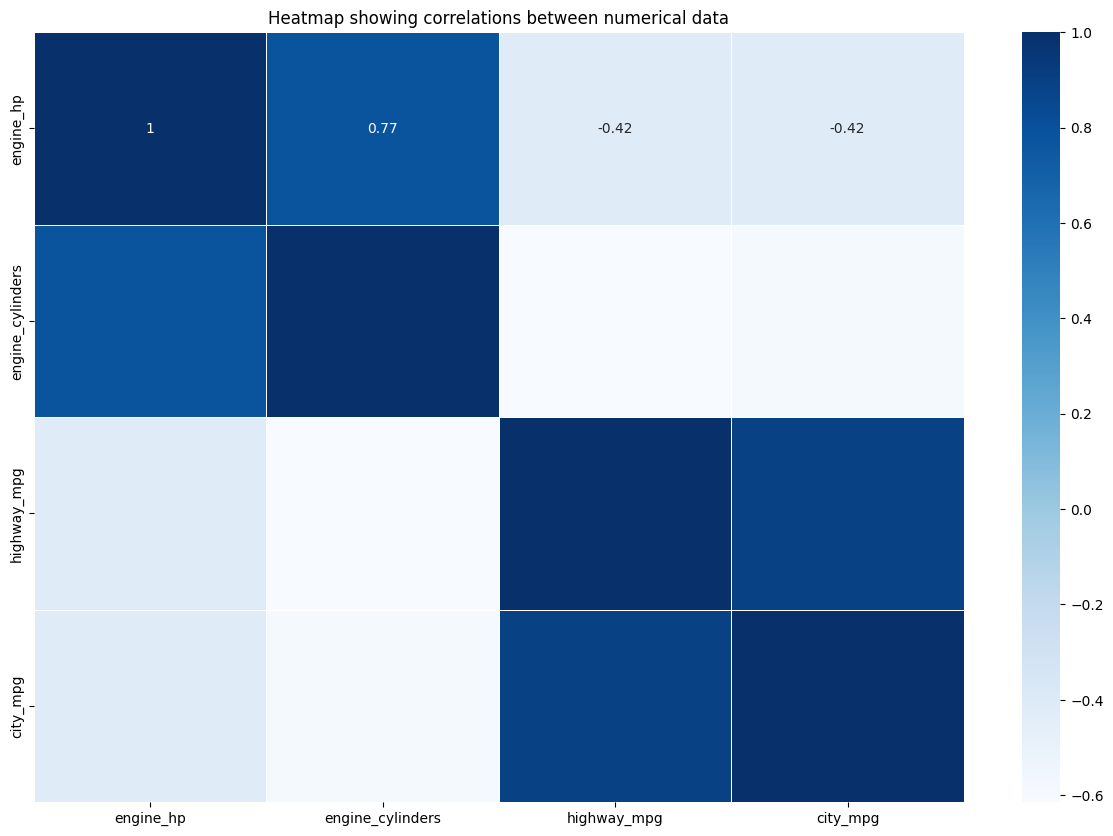

In [94]:
#@ INSPECTING HEATMAP:
plt.figure(figsize=(15,10))  
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [95]:
#@ INSPECTING CORRELATION:
data_numeric.corr().unstack().sort_values(ascending = False)[:15]

engine_hp         engine_hp           1.000000
engine_cylinders  engine_cylinders    1.000000
highway_mpg       highway_mpg         1.000000
city_mpg          city_mpg            1.000000
highway_mpg       city_mpg            0.886829
city_mpg          highway_mpg         0.886829
engine_hp         engine_cylinders    0.774851
engine_cylinders  engine_hp           0.774851
engine_hp         highway_mpg        -0.415707
highway_mpg       engine_hp          -0.415707
engine_hp         city_mpg           -0.424918
city_mpg          engine_hp          -0.424918
engine_cylinders  city_mpg           -0.587306
city_mpg          engine_cylinders   -0.587306
engine_cylinders  highway_mpg        -0.614541
dtype: float64

In [96]:
#@ PROCESSING DATASET:
data_class = data.copy()
mean = data_class['msrp'].mean()

data_class['above_average'] = np.where(data_class['msrp']>=mean,1,0)

In [97]:
#@ PROCESSING DATASET:
data_class = data_class.drop('msrp', axis=1)

In [98]:
#@ SPLITTING THE DATASET:
df_train_full, df_test = train_test_split(data_class, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [99]:
#@ PROCESSING THE DATASET:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [100]:
#@ PROCESSING THE DATASET:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

**MUTUAL INFORMATION:**

In [101]:
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [102]:
data.nunique()

make                   48
model                 914
year                   28
engine_hp             357
engine_cylinders        9
transmission_type       5
vehicle_style          16
highway_mpg            59
city_mpg               69
msrp                 6049
dtype: int64

In [103]:
#@ PREPARING DATASET:
cat = ['transmission_type', 'vehicle_style', 'model', 'make']

#@ DEFINING FUNCTION:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

#@ IMPLEMENTATION:
df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
model,0.462344
make,0.239769
vehicle_style,0.084143
transmission_type,0.020958


In [104]:
#@ PREPARING THE DATASET:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

**CLASSIFICATION AND ACCURACY OF MODEL:**

In [106]:
#@ TRANSFORMING THE DATASET:
num = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
train_dict = df_train[cat + num].to_dict(orient='records')

#@ VECTORIZING THE DATASET:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [107]:
#@ TRAINING LOGISTIC REGRESSSION MODEL:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

#@ INITIALIZING THE MODEL PREDICTION:
val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)

#@ INSPECTING THE ACCURACY:
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.94


In [108]:
#@ INITIALIZING FEATURES:
features = cat + num
features

['transmission_type',
 'vehicle_style',
 'model',
 'make',
 'year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg']

**FEATURE ELIMINATION:**

In [109]:
#@ INSPECTING THE DIFFERENCE IN ACCURACY:
orig_score = accuracy

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

transmission_type 0.0033655056651279436 0.936634494334872
vehicle_style 0.0025262274443977883 0.9374737725556022
model 0.016374318086445627 0.9236256819135543
make 0.0012673101133025 0.9387326898866974
year -0.008804028535459585 0.9488040285354595
engine_hp 0.019311791859001226 0.9206882081409987
engine_cylinders -0.0004112463281578105 0.9404112463281578
highway_mpg -0.002089802769618232 0.9420898027696182
city_mpg -0.006705832983634141 0.9467058329836341


In [110]:
#@ NORMALIZING THE DATA:
data['msrp']=np.log1p(data['msrp'])

In [111]:
#@ SPLITTING THE DATASET:
df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [112]:
#@ PREPARING THE DATASET:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [113]:
#@ PREPARING THE DATASET:
y_train = df_train.msrp.values
y_val = df_val.msrp.values
y_test = df_test.msrp.values

In [114]:
#@ DELETING DATASET:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

**RIDGE REGRESSION:**

In [115]:
#@ PREPARING THE DATASET:
train_dict = df_train[cat + num].to_dict(orient='records')

In [116]:
#@ VECTORIZING THE DATASET:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [117]:
#@ RIDGE REGRESSION IMPLEMENTATION:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 4))

/home/penscola/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0 0.4868


/home/penscola/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.01 0.4868


/home/penscola/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.1 0.4868


/home/penscola/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1 0.4868
10 0.487


/home/penscola/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
